# load_wine

In [1]:
from sklearn import tree
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = sklearn.datasets.load_wine()
print(type(data))
print(data.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['feature_names', 'target_names', 'DESCR', 'target', 'data'])


In [3]:
for f in data.keys():
    t = type(data[f])
    print('key: {}, type: {}'.format(f, t))
    if t == np.ndarray:
        print('shape: {}'.format(data[f].shape))

key: feature_names, type: <class 'list'>
key: target_names, type: <class 'numpy.ndarray'>
shape: (3,)
key: DESCR, type: <class 'str'>
key: target, type: <class 'numpy.ndarray'>
shape: (178,)
key: data, type: <class 'numpy.ndarray'>
shape: (178, 13)


In [4]:
X_data = data.data
y_data = data.target

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # train과 test를 8:2로 분할

In [6]:
model = tree.DecisionTreeClassifier(max_depth=2)

In [7]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
y = model.predict(X_train)

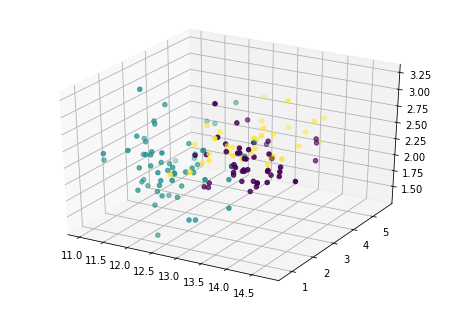

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y_train)
plt.show()

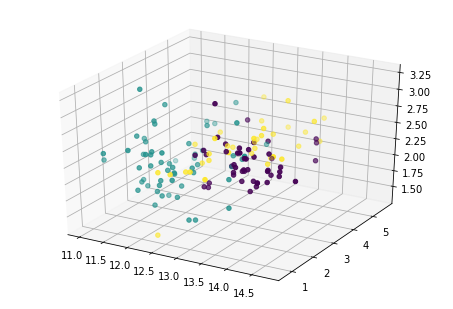

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y)
plt.show()

In [11]:
print(model.score(X_train, y_train))

0.9225352112676056


In [12]:
print(model.score(X_test, y_test))

0.7777777777777778


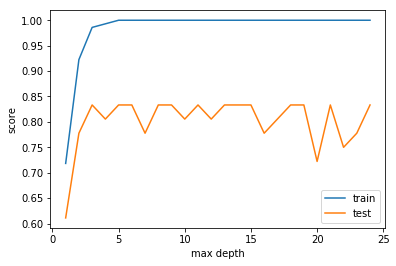

In [13]:
from sklearn.tree import DecisionTreeRegressor

train_score = []
test_score = []
depth_range = range(1, 25)

for depth in depth_range:
    model = tree.DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))

plt.figure()
plt.plot(depth_range, train_score, label='train')
plt.plot(depth_range, test_score, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('score')
plt.show()